In [2]:
import os 
import glob
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from pathlib import Path
from tqdm import tqdm

import wfdb

# PTB-XL

In [ ]:
path = "C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00002_lr"
record = wfdb.rdrecord(path)
record.p_signal.shape

In [3]:
summary = pd.read_csv("C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv")
print(summary.columns)
summary[["strat_fold", "ecg_id", "filename_lr"]]

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')


,strat_fold,ecg_id,filename_lr
0,3,1,records100/00000/00001_lr
1,2,2,records100/00000/00002_lr
2,5,3,records100/00000/00003_lr
3,3,4,records100/00000/00004_lr
4,4,5,records100/00000/00005_lr
...,...,...,...
21794,7,21833,records100/21000/21833_lr
21795,4,21834,records100/21000/21834_lr
21796,2,21835,records100/21000/21835_lr
21797,8,21836,records100/21000/21836_lr


In [7]:
summary["age"]

0         56.0
1         19.0
2         37.0
3         24.0
4         19.0
         ...  
21794     67.0
21795    300.0
21796     59.0
21797     64.0
21798     68.0
Name: age, Length: 21799, dtype: float64

In [ ]:
path = Path("C:/Users/cleme/ETH/Master/Thesis/data/PTB/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/")
data = np.load(path / "ptbxl_preprocessed.npz")
keys = list(data.keys())
arr = []
for key in keys:
    arr.append(np.expand_dims(data[key], axis=0))
stacked = np.concatenate(arr, axis=0)
print(stacked.shape)
np.save(path / "ptbxl.npy", stacked)

# mhc_6mwt_dataset

In [9]:
path = "C:/Users/cleme/ETH/Master/Thesis/data/mhc_6mwt_dataset"
df = pd.read_parquet(path + "/hr_walk.parquet")
df.head(1)

,startDate,value,endDate,type,unit,source,recordId,table_version,metadata.HKMetadataKeyHeartRateMotionContext,metadata.HKDeviceName
0,2015-07-20T22:40:04-0500,82.0,2015-07-20T22:40:04-0500,HKQuantityTypeIdentifierHeartRate,count/min,b128da5c6542bf69de81ddb92e0778318deac8fc5510a1...,a74d2ef1-009a-4b0f-ae38-162b171464f4,1,NaN,None


In [ ]:
with open(path + "/mhc6mwt.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")


In [ ]:
data

In [ ]:
df_rest = pd.read_parquet(path + "/hr_rest.parquet")
df_rest.head(1)

In [ ]:
df_pedometer = pd.read_parquet(path + "/pedometer.parquet")
df_pedometer.head(1)

In [10]:
df_summary = pd.read_parquet(path + "/summary_table.parquet")
print(list(df_summary.columns))
df_summary.head(1)

['6mwt_endtime', '6mwt_startime', '6mwt_total_distance', '6mwt_total_steps', 'age', 'appVersion', 'createdOn', 'createdOnTimeZone', 'dayInStudy', 'deviceRegion', 'distances_at_n_seconds', 'healthCode', 'hr_at_n_seconds', 'hr_unit', 'phoneInfo', 'recordId', 'rest_hr_mean', 'rest_hr_unit', 'steps_at_n_seconds', 'uploadDate', 'walk_hr_mean', 'family_history', 'medications_to_treat', 'userSharingScope', 'ethnicity', 'race', 'education', 'Stroke', 'Transient_Ischemic_Attack', 'Carotid_Artery_Blockage_Stenosis', 'Carotid_Artery_Surgery_or_Stent', 'Peripheral_Vascular_Disease', 'Abdominal_Aortic_Aneurysm', 'Pulmonary_Arterial_Hypertension', 'No_Vascular_Disease', 'Heart_Attack_Myocardial_Infarction', 'Heart_Bypass_Surgery', 'Coronary_Blockage_Stenosis', 'Coronary_Stent_Angioplasty', 'Angina_Heart_Chest_Pains', 'High_Coronary_Calcium_Score', 'Heart_Failure_or_CHF', 'Atrial_Fibrillation_Afib', 'Congenital_Heart_Defect', 'Pulmonary_Hypertension', 'No_Cardiovascular_Disease', 'unhealthy', 'weight

,6mwt_endtime,6mwt_startime,6mwt_total_distance,6mwt_total_steps,age,appVersion,createdOn,createdOnTimeZone,dayInStudy,deviceRegion,...,BiologicalSex,WakeUpTime,CurrentAge,GoSleepTime,HeightCentimeters,WeightKilograms,BloodType,FitzpatrickSkinType,bmi,zip_name
0,2015-03-16 01:08:47-05:00,2015-03-16 01:02:47-05:00,780.44,664.0,40.0,"version 1.0, build 5.1",2015-03-16 06:11:48,None,NaN,US,...,Male,2017-12-07 19:00:00-07:00,43.0,2017-12-07 14:30:00-07:00,177.8,104.32616,None,None,33.001198,other


In [ ]:
df = df[~df["startDate"].str.startswith("65535")]
m1 = df[["startDate", "value","recordId"]]
m2 = df_pedometer[["startDate", "endDate","numberOfSteps","recordId"]]

m1["startDate"] = (pd.to_datetime(m1["startDate"], utc=True)).dt.tz_localize(None).astype("datetime64[ns]")
m2["startDate"] = pd.to_datetime(m2["startDate"], utc=True).dt.tz_localize(None).astype("datetime64[ns]")
m2["endDate"]   = pd.to_datetime(m2["endDate"], utc=True).dt.tz_localize(None).astype("datetime64[ns]")

m1 =m1.sort_values(["startDate"])
m2= m2.sort_values(["endDate"])

print(m1.info())
print(m2.info())

print(m1.columns)
print(m2.columns)

merged = pd.merge(m1, m2, on="recordId")


In [ ]:
merged[merged["recordId"] == "cecb92e9-550d-4886-ba5f-c3267e5205b1"]

In [ ]:
from tqdm import tqdm
for id in tqdm(df["recordId"].unique(),total=len(df["recordId"].unique())):
    hr_test = df[df["recordId"] == id][["value"]]
    acc_test = df_pedometer[df_pedometer["recordId"] == id]
    acc_test = acc_test.sort_values("endDate")
    acc_test = acc_test[["startDate", "endDate", "distance", "numberOfSteps"]]
    acc_test["seconds"] = (acc_test["endDate"] - acc_test["startDate"]).dt.total_seconds().astype(int)

    acc_test["delta_dist"] = acc_test["distance"].diff()
    acc_test["delta_steps"] = acc_test["numberOfSteps"].diff()
    acc_test["delta_sec"] = acc_test["seconds"].diff()

    acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
    acc_test["delta_steps"].iloc[0] = acc_test["numberOfSteps"].iloc[0]
    acc_test["delta_sec"].iloc[0] = acc_test["seconds"].iloc[0]

    acc_test["avg_steps"] = acc_test["delta_steps"] / acc_test["delta_sec"]
    acc_test["avg_dist"] = acc_test["delta_dist"] / acc_test["delta_sec"] 

    df_repeated = acc_test.loc[acc_test.index.repeat(acc_test["delta_sec"])].reset_index(drop=True)
    df_repeated = df_repeated[["avg_steps", "avg_dist"]]
    min_length = min(len(hr_test), len(df_repeated))
    df_concat = pd.concat((hr_test.iloc[:min_length, :], df_repeated.iloc[:min_length, :]), axis=1)
    print(df_concat.values)
     

In [ ]:
acc_test = df_pedometer[df_pedometer["recordId"] == "12cb8614-8c93-49a2-a38f-b8a359fd413c"]
acc_test = acc_test.sort_values("endDate")
acc_test = acc_test[["startDate", "endDate", "distance", "numberOfSteps"]]
acc_test["seconds"] = (acc_test["endDate"] - acc_test["startDate"]).dt.total_seconds().astype(int)

acc_test["delta_dist"] = acc_test["distance"].diff()
acc_test["delta_steps"] = acc_test["numberOfSteps"].diff()
acc_test["delta_sec"] = acc_test["seconds"].diff()

acc_test["delta_dist"].iloc[0] = acc_test["distance"].iloc[0]
acc_test["delta_steps"].iloc[0] = acc_test["numberOfSteps"].iloc[0]
acc_test["delta_sec"].iloc[0] = acc_test["seconds"].iloc[0]

acc_test["avg_steps"] = acc_test["delta_steps"] / acc_test["delta_sec"]
acc_test["avg_dist"] = acc_test["delta_dist"] / acc_test["delta_sec"] 
acc_test

In [ ]:
df_repeated = acc_test.loc[acc_test.index.repeat(acc_test["delta_sec"])].reset_index(drop=True)
df_repeated = df_repeated[["avg_steps", "avg_dist"]]
df_repeated.head(20)
min_length = min(len(hr_test), len(df_repeated))
print(min_length)
pd.concat((hr_test.iloc[:min_length, :], df_repeated.iloc[:min_length, :]), axis=1)

In [ ]:
for i in range(len(acc_test)):
    row = acc_test.iloc[i,:]
    seconds = row["delta_sec"]
    avg_distance = row["delta_dist"] / seconds 
    avg_steps = row["delta_steps"] / seconds 
    print(f"seconds: {seconds} | distance {avg_distance} | steps {avg_steps}") 

# DaLiA Dataset

In [67]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/DaLiA/data/PPG_FieldStudy"
participant_paths = glob.glob(os.path.join(data_path, '**', '*_quest.csv'), recursive=True)
series = []
for participant in participant_paths:
   row = pd.read_csv(participant, header=None).T
   row.columns = [el.split(" ")[1] for el in row.iloc[0]]
   row = row.drop(row.index[0])
   series.append(row)

df = pd.concat(series, ignore_index=True)
# df["SUBJECT_ID"] = df["SUBJECT_ID"].str.replace("S", "", regex=True).astype(int)
df = df.sort_values("SUBJECT_ID").reset_index(drop=True)
# now we normalize the continuous values and create one-hot encodings 
df[["AGE", "HEIGHT", "WEIGHT"]] = (df[["AGE", "HEIGHT", "WEIGHT"]].astype(float) - df[["AGE", "HEIGHT", "WEIGHT"]].astype(float).mean()) / (df[["AGE", "HEIGHT", "WEIGHT"]].astype(float).std() + 1e-8)
df["GENDER"] = df["GENDER"].str.strip().apply(lambda x: 0 if x == "m" else 1)
one_hot_skin = pd.get_dummies(df["SKIN"], prefix="skin") * 1
df = pd.concat([df, one_hot_skin],axis=1)
one_hot_sport = pd.get_dummies(df["SPORT"], prefix="sport") * 1
df = pd.concat([df, one_hot_sport], axis=1)
df = df.drop(["SKIN", "SPORT"], axis=1)
df["SUBJECT_ID"] = df["SUBJECT_ID"].str.strip()
df.to_csv(data_path + "/static_participant_features.csv")
df

,SUBJECT_ID,AGE,GENDER,HEIGHT,WEIGHT,skin_ 2,skin_ 3,skin_ 4,sport_ 1,sport_ 2,sport_ 4,sport_ 5,sport_ 6
0,S1,0.342505,0,0.740696,0.704317,0,1,0,0,0,0,0,1
1,S10,2.457974,1,-1.239382,-1.017347,0,0,1,0,0,0,1,0
2,S11,-0.664862,1,-0.799365,-0.547802,0,1,0,0,0,0,1,0
3,S12,1.249134,0,2.170752,2.817270,0,1,0,0,0,0,1,0
4,S13,-0.967072,1,-0.579356,-0.469545,0,1,0,0,0,0,0,1
5,S14,-0.463389,1,-0.579356,-0.156515,0,1,0,0,0,1,0,0
6,S15,-0.261915,0,0.850700,0.782575,1,0,0,0,0,0,1,0
7,S2,-0.261915,0,1.510726,0.860832,0,1,0,0,0,0,1,0
8,S3,-0.564125,0,-0.579356,-0.704317,0,1,0,0,0,0,1,0
9,S4,-0.564125,0,-0.799365,-0.939090,0,0,1,0,0,0,1,0


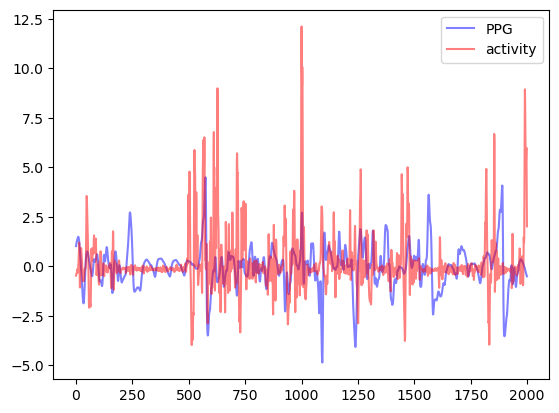

In [2]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/euler"
np_data = np.load(data_path + "/dalia_preprocessed/S1.npz")

def scale(data):
    return (data - np.mean(data)) / (np.std(data) + 1e-8)

series = np_data['bvp'][:, 0]
series = scale(series)


activity = scale(np_data["acc_norm_ppg"])

highest_activity = np.argmax(activity)
lower = max(highest_activity-1000,0)
upper = min(highest_activity+1000,len(np_data['bvp']))
serie = pd.Series(series[lower: upper])
serie.plot(alpha=0.5, color="blue", label="PPG")
activity_plot = pd.Series(activity[lower:upper])
activity_plot.plot(alpha=0.5, color="red", label="activity")
plt.legend()

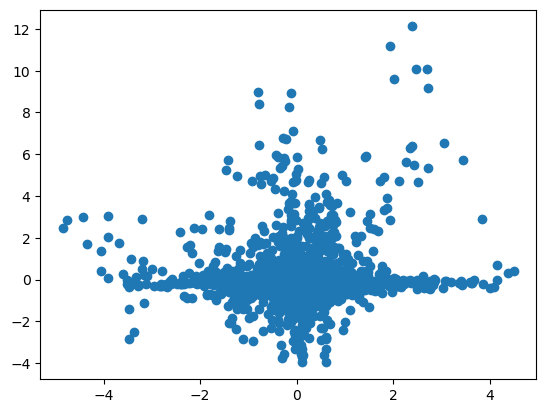

In [3]:
plt.scatter(serie, activity_plot)

In [13]:
max_corr_coeff = np.argmax(np.abs(np.correlate(serie, activity_plot.values, mode="full") / len(serie)))
len(serie)

2000

# UCIHAR Dataset

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/UCIHAR/UCI HAR Dataset/UCI HAR Dataset/"
data = np.load(datadir + "ucihar_preprocessed.npz")
data

In [ ]:
data['train_val_subjects'].shape[0] == data['X_train'].shape[0]

In [ ]:
data['X_test'].shape[0] == data['y_test'].shape[0]

In [ ]:
pd.Series(data['y_train']).unique()

In [ ]:
inertial = "C:/Users/cleme/ETH/Master/Thesis/data/euler/UCIHAR/train/Inertial Signals/"
data_x = np.loadtxt(inertial + "total_acc_x_train.txt")
data_x.shape

In [ ]:
y_train = np.loadtxt(datadir + "train/y_train.txt")
y_test = np.loadtxt(datadir + "test/y_test.txt")
print(pd.Series(y_train).unique())
print(pd.Series(y_test).unique())

In [ ]:
body_acc_x = np.loadtxt(datadir + "Inertial Signals/body_acc_x_train.txt")

# USC Dataset

In [14]:

datadir = "C:/Users/cleme/ETH/Master/Thesis/data/USC/USC-HAD/"
file_dir = datadir + "Subject1/a1t1.mat"
data = loadmat(file_dir)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Oct 17 17:39:12 2010',
 '__version__': '1.0',
 '__globals__': [],
 'title': array(['USC Human Motion Dataset'], dtype='<U24'),
 'version': array(['1.0'], dtype='<U3'),
 'date': array(['Oct-2010'], dtype='<U8'),
 'subject': array(['1'], dtype='<U1'),
 'age': array(['27'], dtype='<U2'),
 'height': array(['164cm'], dtype='<U5'),
 'weight': array(['43kg'], dtype='<U4'),
 'activity': array(['walking-forward'], dtype='<U15'),
 'activity_number': array(['1'], dtype='<U1'),
 'trial': array(['1'], dtype='<U1'),
 'sensor_location': array(['front-right-hip'], dtype='<U15'),
 'sensor_orientation': array(['x-gravity-y-walking-direction-z-vertical-to-walking-direction'],
       dtype='<U61'),
 'sensor_readings': array([[ 1.16277993e+00, -1.89287394e-01, -2.95780540e-01,
         -1.87813244e+01,  3.36187220e+00, -1.68631287e+01],
        [ 1.03229570e+00, -2.00144812e-01, -3.76303941e-01,
         -1.35445089e+01,  5.77886438e+00

In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[list(range(1, 13))], sparse_output=False)
encoder.fit_transform(np.array(['11']).astype(int)[np.newaxis,:])

In [ ]:
subjects = {"age" : [], "height": [], "weight": []}
for i in range(1,15):
    file_dir = datadir + f"Subject{i}/a1t1.mat"
    data = loadmat(file_dir)
    subjects['age'].append(int(data['age'][0]))
    subjects['height'].append(int(data['height'][0][:3]))
    subjects['weight'].append(int(data['weight'][0][:2]))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

data = pd.DataFrame(subjects)

# Use KMeans to create clusters (diversity groups)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['age', 'height', 'weight']])

# Stratify by cluster to maintain diversity
train_val, test = train_test_split(data, test_size=3, stratify=data['cluster'], random_state=42)
train, val = train_test_split(train_val, test_size=3, stratify=train_val['cluster'], random_state=42)

# Drop cluster column before using
train = train.drop(columns='cluster')
val = val.drop(columns='cluster')
test = test.drop(columns='cluster')

print("Train subjects:\n", sorted(train.index + 1))
print("\nValidation subjects:\n", sorted(val.index + 1))
print("\nTest subjects:\n", sorted(test.index + 1))

# Capture 24

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Capture24/capture24"
df = pd.read_csv(datadir + "/P001.csv")
df

In [ ]:
data = np.load(datadir + "/capture24_preprocessed/P001.npy")

In [ ]:
no_time = df.drop(["time"], axis=1)
downsampled = no_time.iloc[::4]  # downsample by factor of 4 | 100Hz => 25Hz
downsampled["annotation"] = downsampled["annotation"].str.split().str[-1].astype(float)
downsampled["annotation"] = downsampled["annotation"].interpolate()
no_index = downsampled.reset_index(drop=True)
no_index



In [ ]:
no_index['annotation'].plot()

In [ ]:
np.load()

# WildPPG

In [ ]:
datadir="C:/Users/cleme/ETH/Master/Thesis/data/euler/wildppg_preprocessed/"
file_path = datadir + "WildPPG_Part_an0.npz"
data = np.load(file_path)

In [ ]:
datadir="C:/Users/cleme/ETH/Master/Thesis/data/euler/wildppg_preprocessed/WildPPG.mat"
data = loadmat(datadir)


In [ ]:
data['data_imu_wrist'][0,0].shape

In [ ]:
arr = np.array([[1,2,3,4]]).T
print(arr.shape)
np.repeat(arr, 4,axis=1).shape

In [ ]:
activity = data['data_imu_wrist'][0,0]
pd.Series(activity.squeeze()).plot()

In [ ]:
hr = data['data_bpm_values'][i,0]
print(hr.shape)
pd.Series(hr.squeeze()).plot()

In [ ]:
for i in range(16):
    hr = data['data_bpm_values'][i,0]
    activity = data['data_imu_wrist'][i,0]
    ppg = data['data_ppg_wrist'][i, 0]
    print(hr.shape)
    print(activity.shape)
    print(ppg.shape)

In [ ]:
any(pd.Series(data['data_bpm_values'][0,0].astype(int).squeeze()).isna())

In [ ]:
data['data_ppg_wrist'][0][0].shape

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/WildPPG/data"
file_pat = datadir + "/WildPPG_Part_an0.mat"
data = loadmat(file_pat)

In [ ]:
data['sternum']

In [ ]:
ecg = data['sternum']['ecg'][0][0][0][0][2].squeeze()

In [ ]:
import neurokit2 as nk 
signals, info = nk.ecg_process(ecg, sampling_rate=128)

In [ ]:
ecg_time = ecg.shape[0] / 128
time_rpeaks = info['ECG_R_Peaks'] / 128
diffed = np.diff(time_rpeaks)
hr = 60 / diffed 
window_size = 128 * 8 
stride = 128 * 2 
ecg_time

In [ ]:
pd.Series(data['sternum']['ecg'][0][0][0][0][2].squeeze(0)[:1000]).plot()

In [ ]:
print(data['wrist']['ppg_g'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_r'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_ir'][0][0][0]['v'][0].shape)

In [ ]:
from pathlib import Path 
datadir = Path(datadir)
lengths = []
for path in datadir.glob('*.mat'):
    data = loadmat(path)
    lengths.append(data['wrist']['acc_x'][0][0][0][0][2].shape[1])
    del data

In [ ]:
lengths

In [ ]:
names = []
for path in datadir.glob("*.mat"):
    names.append(str(path).split("_")[-1][:3])
names

# IEEE Dataset

The IEEE Dataset does not contain any activity labels or acceleration data. 

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/euler/IEEEPPG/Training_data/Training_data"
data = loadmat(datadir + "/DATA_01_TYPE01.mat")
hr = loadmat(datadir + "/DATA_01_TYPE01_BPMtrace.mat")


In [ ]:
signal_files = Path(datadir).glob("*[12].mat")
bpm_files = Path(datadir).glob("*_BPMtrace.mat")

fs = 125  # sampling rate
window_duration = 8
overlap_duration = 6 

from numpy.lib.stride_tricks import sliding_window_view
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler

def filter_butter(x, fs):
    f1 = 0.5
    f2 = 4
    Wn = [f1, f2]
    N = 4
    b, a = butter(N, Wn, btype="bandpass", fs=fs)
    filtered = filtfilt(b, a, x)
    # Normalize to range [0, 1]
    scaler = MinMaxScaler()
    filtered = scaler.fit_transform(filtered.reshape(-1, 1)).flatten()
    return filtered

def preprocess_signal(signal: np.ndarray):
    # create windows
    windows = sliding_window_view(signal, window_shape=window_duration * fs)[
        :: (window_duration - overlap_duration) * fs
    ]
    # downsample from 125Hz => 25Hz
    downsampled_windows = windows[:, ::5]

    return downsampled_windows

participant_signals = []
participant_bpms = []
for i,(signal_file, bpm_file) in enumerate(zip(signal_files, bpm_files)):

    signals = loadmat(signal_file)["sig"]
    bpm = loadmat(bpm_file)['BPM0']

    ppg1 = filter_butter(signals[1], fs)
    ppg2 = filter_butter(signals[2], fs)
    acc_x = filter_butter(signals[3], fs)
    acc_y = filter_butter(signals[4], fs)
    acc_z = filter_butter(signals[5], fs)

    avg_ppg = (ppg1 + ppg2) / 2
    acc = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    ppg = preprocess_signal(avg_ppg)[:, :, np.newaxis]  # add concatenation axis
    acc = preprocess_signal(acc)[:, :, np.newaxis]
    combined_signal = np.concatenate((ppg, acc), axis=-1)  # Shape (W, T, 2)

    signal_data = combined_signal[:-1]
    if len(signal_data) != len(bpm):
        print(
                f"bpm {len(bpm)}and signal_data {len(signal_data)} are not the same shape "
        )
        signal_data = combined_signal[:]         
      

    print(len(signal_data))
    print(len(bpm))
    assert len(signal_data) == len(bpm)

    participant_signals.append(signal_data)
    participant_bpms.append(bpm)


stacked_signals = np.stack(participant_signals, axis=0)
stacked_bpms = np.stack(participant_bpms, axis=0)

In [ ]:
data['sig'][0]

In [ ]:
hr['BPM0'].shape

In [ ]:
data['whole_dataset'][0][0]

# Chapman 

In [ ]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Chapman/"
data = loadmat(datadir + "chapman.mat")


In [ ]:
data['whole_data'][0][0].shape

In [ ]:
df = pd.DataFrame(data['whole_data'])
df[0].values[1].shape

In [ ]:
df = pd.DataFrame(data['whole_data'])[1].apply(lambda x: x[0][0])
plt.hist(df.values)
print(df.unique())